In [1]:
!which python

/sw/centos/anaconda3/2019.10/bin/python


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load Feature Data of the EgoNet

In [3]:
import pickle

with open("feature_dict.pickle", 'rb') as handle:
    egonet_feature = pickle.load(handle)

In [4]:
print("Total number of node (ego): {}".format(len(egonet_feature)))

Total number of node (ego): 327626


In [5]:
# key: node ids
# data (list): [Ni, Ei, Wi, Lambda_w_i]
Ni_list = []
Ei_list = []
Wi_list = []
Lambda_w_i_list = []
for key, data in egonet_feature.items():
    Ni_list.append(data[0])
    Ei_list.append(data[1])
    Wi_list.append(data[2])
    Lambda_w_i_list.append(data[3])

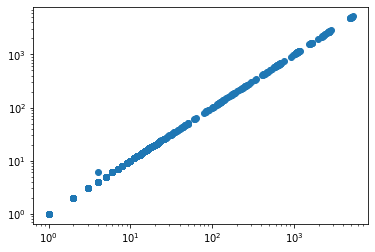

In [7]:
plt.scatter(Ni_list, Ei_list)
plt.xscale('log')
plt.yscale('log')
plt.show()

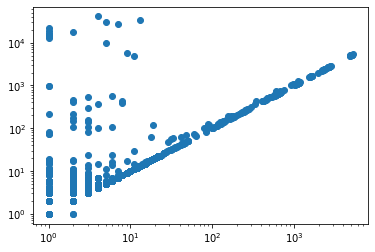

In [8]:
plt.scatter(Ei_list, Wi_list)
plt.xscale('log')
plt.yscale('log')
plt.show()

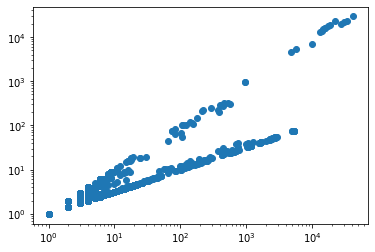

In [9]:
plt.scatter(Wi_list, Lambda_w_i_list)
plt.xscale('log')
plt.yscale('log')
plt.show()

# Load Label for each node

In [6]:
graph_data_with_label = []
with open('../../sample_data_withlabel_dataset4.txt', 'r') as f:
    for line in f:
        src_node_id = int(line.split()[0])
        trg_node_id = int(line.split()[1])
        edge_weight = int(line.split()[2])
        edge_label = int(line.split()[3])
        graph_data_with_label.append([src_node_id, trg_node_id, edge_weight, edge_label])

In [7]:
print(len(graph_data_with_label))

289185


In [8]:
import pandas as pd
graph_data_with_label_df = pd.DataFrame(graph_data_with_label)

In [9]:
graph_data_with_label_df

,0,1,2,3
0,0,0,216,0
1,1,2,174,0
2,1,240163,229,0
3,2,2,216,0
4,2,3,3,0
...,...,...,...,...
289180,240158,115,1,0
289181,240159,243111,1,0
289182,240160,118,1,0
289183,240161,327625,1,0


In [10]:
graph_data_with_label_df.columns=['src_node', 'trg_node', 'edge_weight', 'edge_label']

In [11]:
graph_data_with_label_df

,src_node,trg_node,edge_weight,edge_label
0,0,0,216,0
1,1,2,174,0
2,1,240163,229,0
3,2,2,216,0
4,2,3,3,0
...,...,...,...,...
289180,240158,115,1,0
289181,240159,243111,1,0
289182,240160,118,1,0
289183,240161,327625,1,0


In [12]:
np.sum(list(graph_data_with_label_df['edge_label']))

15772

In [13]:
from collections import Counter
# NOTE: we assume a node to be vulnerable if it is set to be attack as a src node
node_label = []
for key, data in egonet_feature.items():
    retrieved_df = graph_data_with_label_df.loc[(graph_data_with_label_df['src_node']==key)]
    edge_label_counter = Counter(retrieved_df['edge_label'])
    if edge_label_counter[1] != 0:
        node_label.append(1)
    else:
        node_label.append(0)

In [14]:
len(node_label)

327626

In [15]:
np.sum(node_label)

15219

In [16]:
node_label_color = []
for label in node_label:
    if label == 0:
        node_label_color.append('b')
    else:
        node_label_color.append('r')

In [17]:
Counter(node_label_color)

Counter({'b': 312407, 'r': 15219})

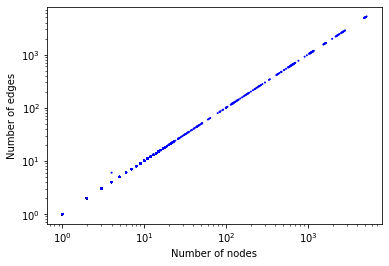

In [18]:
plt.scatter(Ni_list, Ei_list, s=1, c=node_label_color)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of nodes')
plt.ylabel('Number of edges')
plt.title('Only source nodes')
plt.show()

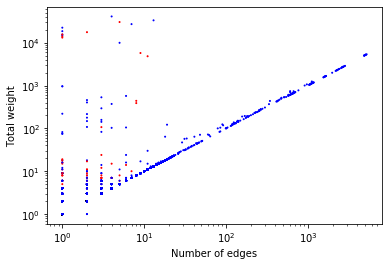

In [19]:
plt.scatter(Ei_list, Wi_list, s=1, c=node_label_color)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of edges')
plt.ylabel('Total weight')
plt.title('Only source nodes')
plt.show()

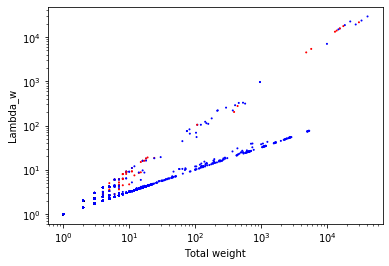

In [21]:
import matplotlib
# matplotlib.rcParams['text.usetex'] = True
plt.scatter(Wi_list, Lambda_w_i_list, s=1, c=node_label_color)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Total weight')
plt.ylabel('Lambda_w')
plt.title('Only source nodes')
plt.show()

In [22]:
# NOTE: now we assume a node to be vulnerable if it is set to be attack as a src node or being attack as a trg node
node_label_srctrg = []
for key, data in egonet_feature.items():
    retrieved_df = graph_data_with_label_df.loc[(graph_data_with_label_df['src_node']==key) | (graph_data_with_label_df['trg_node']==key)]
    edge_label_counter = Counter(retrieved_df['edge_label'])
    if edge_label_counter[1] != 0:
        node_label_srctrg.append(1)
    else:
        node_label_srctrg.append(0)

In [23]:
node_label_color_srctrg = []
for label in node_label_srctrg:
    if label == 0:
        node_label_color_srctrg.append('b')
    else:
        node_label_color_srctrg.append('r')

In [24]:
len(node_label_color_srctrg)

327626

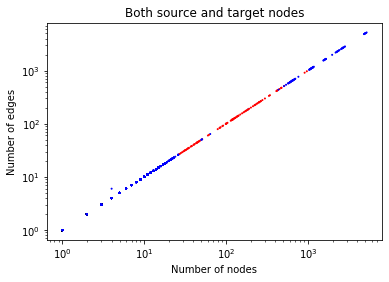

In [26]:
plt.scatter(Ni_list, Ei_list, s=1, c=node_label_color_srctrg)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of nodes')
plt.ylabel('Number of edges')
plt.title('Both source and target nodes')
plt.show()

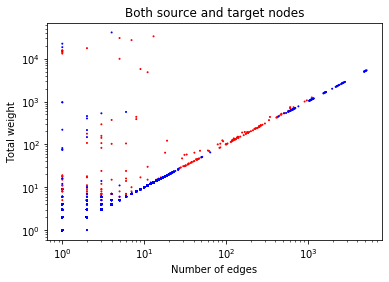

In [27]:
plt.scatter(Ei_list, Wi_list, s=1, c=node_label_color_srctrg)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of edges')
plt.ylabel('Total weight')
plt.title('Both source and target nodes')
plt.show()

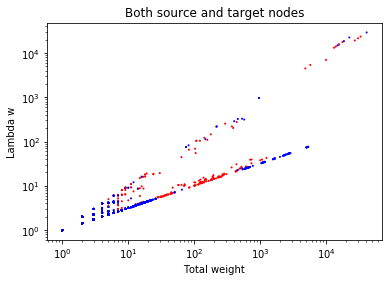

In [28]:
plt.scatter(Wi_list, Lambda_w_i_list, s=1, c=node_label_color_srctrg)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Total weight')
plt.ylabel('Lambda w')
plt.title('Both source and target nodes')
plt.show()